Write a computer function which can calculate the log likelihood ratio test for modeling
CpG islands. The input should be a collection of sequences from CpG islands, and a
collection of sequences from non-CpG islands. This will be your training set. The other
input should be a query sequence. Using the training set the transition matrices will be
constructed and then the log-likelihood ratio statistics should be computed based on
the query sequence and the transition probability matrix. Then you need to generate a
p-value using Monte Carlo sampling. The number of Monte Carlo samples will also be a
user given parameter. The Monte Carlo samples will be used to create the empirical
distribution of the log-likelihood ratio test statistic. Attached are the two libraries, and
couple of query sequence that you need to use to run your calculation and make your
inference about “does it come from a CpG island?”(100 points)

In [203]:
import numpy as np
from collections import Counter
from collections import defaultdict
import csv
from itertools import *
from pandas import DataFrame
from pandas import Series
from __future__ import division
import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import random

In [186]:
def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = tee(iterable)
    next(b, None)
    return izip(a, b)

In [187]:
def transitionscount_2freq(countmatrix):
    freqmatrix = defaultdict(lambda: {'G':0,'A':0,'T':0,'C':0})
    for i in ['A','C','G','T']:
        itemcount = sum(countmatrix[i].values())
        for k,v in countmatrix[i].items():    
            freqmatrix[i][k] = v/itemcount
    return freqmatrix

In [188]:
!!head -n 2 cpg_island.txt

[' [1] "G" "C" "A" "A" "G" "G" "C" "C" "G" "C" "T" "C" "C" "G" "G" "G" "G" "G" "C" "C" "A" "A" "T" "G" "C" "A" "C" "G" "T" "C"',
 '']

In [189]:
cpgtransitions = defaultdict(lambda: {'G':0,'A':0,'T':0,'C':0})
with open('cpg_island.txt', 'rb') as f:
    for row in csv.reader(f, delimiter=' ', skipinitialspace=True):
        if ''.join(row[1:]):
            cpgisland = ''.join(row[1:])
            for statei, stateiplus in pairwise(cpgisland):
                cpgtransitions[statei][stateiplus] +=1
cpgtransitions.items()

[('A', {'A': 8, 'C': 7, 'G': 26, 'T': 8}),
 ('C', {'A': 23, 'C': 31, 'G': 20, 'T': 19}),
 ('T', {'A': 1, 'C': 16, 'G': 21, 'T': 6}),
 ('G', {'A': 19, 'C': 36, 'G': 38, 'T': 11})]

In [190]:
cpg_transitions = transitionscount_2freq(cpgtransitions)
cpg_transitions.items()

[('A',
  {'A': 0.16326530612244897,
   'C': 0.14285714285714285,
   'G': 0.5306122448979592,
   'T': 0.16326530612244897}),
 ('C',
  {'A': 0.24731182795698925,
   'C': 0.3333333333333333,
   'G': 0.21505376344086022,
   'T': 0.20430107526881722}),
 ('T',
  {'A': 0.022727272727272728,
   'C': 0.36363636363636365,
   'G': 0.4772727272727273,
   'T': 0.13636363636363635}),
 ('G',
  {'A': 0.18269230769230768,
   'C': 0.34615384615384615,
   'G': 0.36538461538461536,
   'T': 0.10576923076923077})]

In [191]:
non_cpg_trans = defaultdict(lambda: {'G':0,'A':0,'T':0,'C':0})
with open('non_cpg_island.txt', 'rb') as f:
    for row in csv.reader(f, delimiter=' ', skipinitialspace=True):
        if ''.join(row[1:]):
            string = ''.join(row[1:])
            for statei, stateiplus in pairwise(string):
                non_cpg_trans[statei][stateiplus] +=1
print non_cpg_trans.items()
non_cpg_transitions=transitionscount_2freq(non_cpg_trans)
non_cpg_transitions.items()

[('A', {'A': 30, 'C': 9, 'T': 17, 'G': 18}), ('C', {'A': 15, 'C': 16, 'T': 19, 'G': 8}), ('T', {'A': 15, 'C': 18, 'T': 28, 'G': 25}), ('G', {'A': 19, 'C': 14, 'T': 19, 'G': 20})]


[('A',
  {'A': 0.40540540540540543,
   'C': 0.12162162162162163,
   'G': 0.24324324324324326,
   'T': 0.22972972972972974}),
 ('C',
  {'A': 0.25862068965517243,
   'C': 0.27586206896551724,
   'G': 0.13793103448275862,
   'T': 0.3275862068965517}),
 ('T',
  {'A': 0.1744186046511628,
   'C': 0.20930232558139536,
   'G': 0.29069767441860467,
   'T': 0.32558139534883723}),
 ('G',
  {'A': 0.2638888888888889,
   'C': 0.19444444444444445,
   'G': 0.2777777777777778,
   'T': 0.2638888888888889})]

In [192]:
logscorer = defaultdict(lambda: {'G':0,'A':0,'T':0,'C':0})
for i in ['A','C','G','T']:
    for k,v in cpg_transitions[i].items():    
        logscorer[i][k] = np.log(v/non_cpg_transitions[i][k])
logscorer.items()
 

[('A',
  {'A': -0.90951104488877654,
   'C': 0.16093036681263692,
   'G': 0.77996957521886057,
   'T': -0.34152700728283708}),
 ('C',
  {'A': -0.044712467779896986,
   'C': 0.18924199963852834,
   'G': 0.44413424926731843,
   'T': -0.4721564826068364}),
 ('T',
  {'A': -2.0378925387669633,
   'C': 0.55237462667886306,
   'G': 0.49580427519046882,
   'T': -0.87028737861190253}),
 ('G',
  {'A': -0.3677247801253174,
   'C': 0.576736828715534,
   'G': 0.27412910604707724,
   'T': -0.91426848649338721})]

In [219]:
def likelihood_ratio(input):
    return sum([logscorer[statei][stateiplus] for statei, stateiplus in pairwise(input)])
print likelihood_ratio2('CACTAAGCTA')

-4.45668478467


In [255]:
def empiricalsampler(chooseruns):
    likelihooddist = []
    for j in range(chooseruns):
        bank = ''.join(random.choice('ATCG') for i in range(30))
        likelihooddist.append(likelihood_ratio(bank))
    likelihooddist.sort()
    return likelihooddist

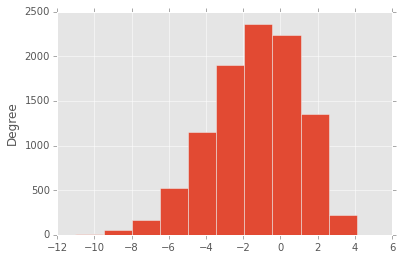

In [256]:
Series(likelihooddist).plot(kind = 'hist')


In [272]:
def rank_query(sequence,samplingsize):
    sampled = empiricalsampler(samplingsize)
    empiricalscore = likelihood_ratio(sequence)
    return empiricalscore,len([i for i in sampled if i < empiricalscore])/samplingsize


In [275]:
test = '"G" "T" "A" "T" "C" "G" "G" "G" "T" "G" "T" "C" "A" "G" "G" "C" "A" "A" "G" "T"'
stripped = test.replace('"','')
final=stripped.replace(' ','')
print final
rank_query(final,10000)


GTATCGGGTGTCAGGCAAGT


(-2.0316783973619206, 0.7008)

In [276]:
test = '  "C" "A" "T" "T" "T" "T" "G" "T" "C" "A" "A" "C" "A" "T" "T" "G" "C" "C" "C" "T"'
stripped = test.replace('"','')
final=stripped.replace(' ','')
print final
rank_query(final,10000)

CATTTTGTCAACATTGCCCT


(-3.9341425744769474, 0.5244)

In [277]:
test = '  "C" "C" "T" "A" "C" "C" "G" "A" "T" "G"'
stripped = test.replace('"','')
final=stripped.replace(' ','')
print final
rank_query(final,10000)

CCTACCGATG


(-1.7399479182344733, 0.72)

#results

The preceeding cells tested the provided sequences for the likelihood of their origin in a cpg or non cpg segment of the genome. By sampling random sequences and testing them in the model of transition probablities built on samples from cpg and non cpg sites a distribution of outcomes under this model is available for comparison to the test statistic associated with the sequences. Based on this distribtuion, all of the tested sequences originate from a non cpg island.

However, none of them have test statistics associated with the extreme end of the distribution. That implies that they can not be clearly distinguished from samples randomly selected from the genome, and assignment to the non-cpg island catagory should be done with reservation. For instance, 70% of randomly sampled sequences had a more extreme test statistic than the one associated with GTATCGGGTGTCAGGCAAGT